In [33]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
import matplotlib.pyplot as plt

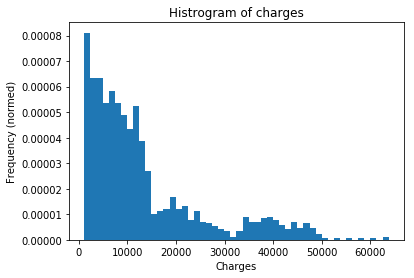

In [12]:
df.charges.plot.hist(bins = 50, normed = True)
plt.title("Histrogram of charges")
plt.xlabel("Charges")
plt.ylabel("Frequency (normed)");

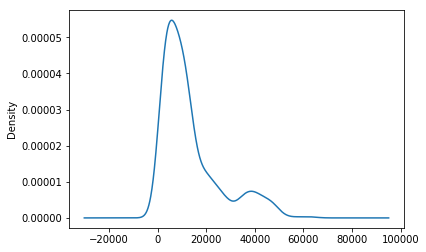

In [7]:
df.charges.plot.density()

Text(0.5,1,'Boxplot of the charges')

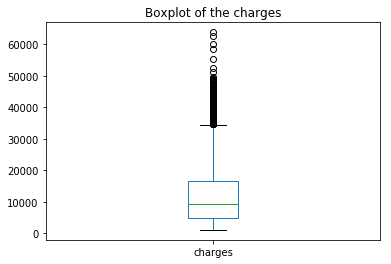

In [16]:
df.charges.plot.box()
#plt.xlabel("Charges")
plt.title("Boxplot of the charges")

In [20]:
values = df.charges
q1, q2, q3 = np.percentile(values, [25, 50, 75])
q1, q2, q3

(4740.28715, 9382.033, 16639.912515)

In [21]:
iqr = q3 - q1

In [22]:
upper_whisher = min(np.max(values), q3 + 1.5 * iqr)
upper_whisher

34489.350562499996

In [23]:
lower_whisher = max(np.min(values), q1 - 1.5 * iqr)
lower_whisher

1121.8739

In [26]:
def find_outliers(values):
    q1, q2, q3 = np.percentile(values, [25, 50, 75])
    iqr = q3 - q1
    upper_whisher = min(np.max(values), q3 + 1.5 * iqr)
    lower_whisher = max(np.min(values), q1 - 1.5 * iqr)
    return (values > upper_whisher) | (values < lower_whisher)

In [29]:
outliers = find_outliers(df.charges)
outliers.value_counts()

False    1199
True      139
Name: charges, dtype: int64

In [34]:
df[outliers]

,age,gender,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [31]:
values = np.array([10, 13, 16, 19, 23, 11, 1000])
np.mean(values), np.median(values)

(156.0, 16.0)

In [32]:
values = np.array([10, 13, 16, 19, 23, 11])
np.mean(values), np.median(values)

(15.333333333333334, 14.5)

- mean = non robust statistics
- media = robust statistics


The above definition of outliers is robust

In [35]:
outliers = find_outliers(np.log(df.charges))
outliers.value_counts()

False    1338
Name: charges, dtype: int64

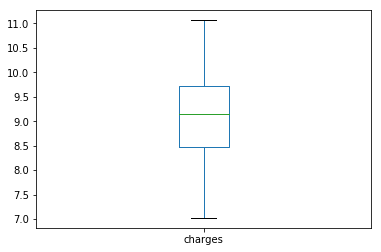

In [36]:
pd.Series(np.log(df.charges)).plot.box()

Text(0,0.5,'Frequency')

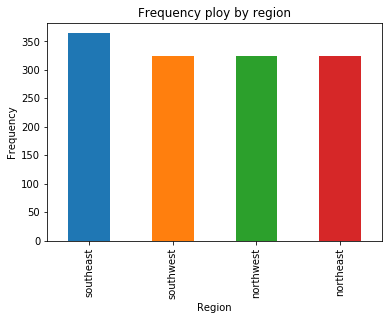

In [42]:
df.region.value_counts().sort_values(ascending = False).plot.bar()
plt.title("Frequency ploy by region")
plt.xlabel("Region")
plt.ylabel("Frequency")

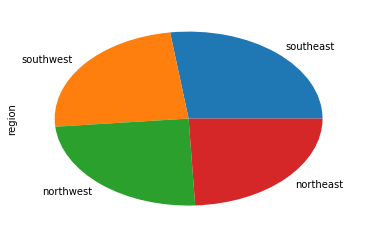

In [43]:
df.region.value_counts().sort_values(ascending = False).plot.pie()

In [47]:
type({}), type((1,)), type([])

(dict, tuple, list)

In [50]:
v = (3, 1, 2, "hello")
type(v)

tuple

Text(0.5,1,'Scatter plot charges by age')

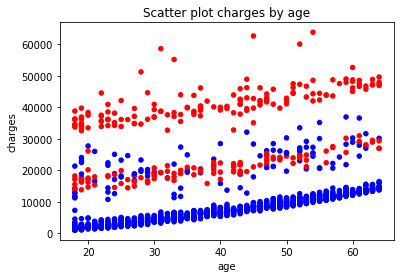

In [55]:
colors = np.where(df.smoker == "no", "blue", "red")
df.plot.scatter("age", "charges", color = colors)
plt.title("Scatter plot charges by age")

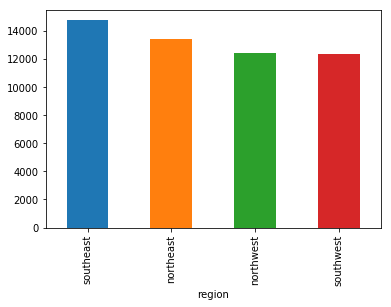

In [57]:
df.groupby("region").charges.mean().sort_values(ascending = False).plot.bar()

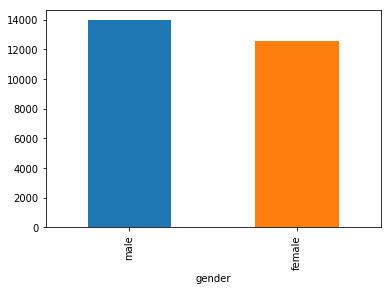

In [68]:
df.groupby("gender").charges.mean().sort_values(ascending = False).plot.bar()

In [58]:
import seaborn as sns

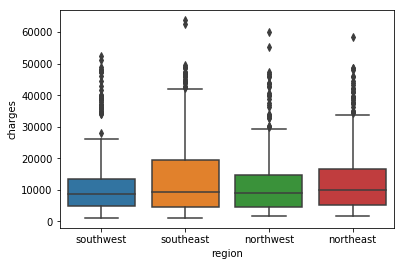

In [59]:
sns.boxplot("region", "charges", data=df)

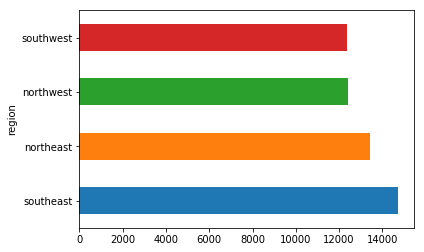

In [63]:
# Horizonal bar is not suitable in this case.
# It is suitable when dependent varible is categorical and independent variable is cont. 
# like in case of classification problems that we will see tomorrow.
df.groupby("region").charges.mean().sort_values(ascending = False).plot.barh()

In [65]:
#sns.heatmap()
agg = df.pivot_table("charges", "region", "gender")
agg

gender,female,male
region,,
northeast,12953.203151,13854.005374
northwest,12479.870397,12354.119575
southeast,13499.669243,15879.617173
southwest,11274.411264,13412.883576


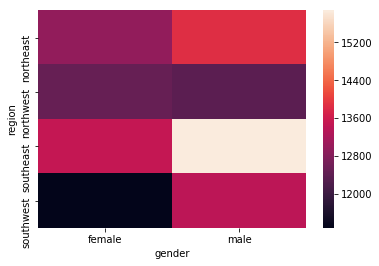

In [66]:
sns.heatmap(agg)

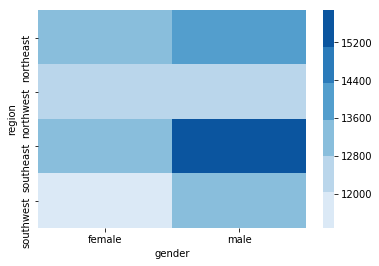

In [67]:
sns.heatmap(agg, cmap=sns.color_palette("Blues"))